In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
import elephant_experiment_analysis as ea

In [124]:
runs = ea.get_all_expe()
runs

['1617112953#EXPE3',
 '1617133893#EXPE3',
 '1617110108#EXPE3',
 '1617110962#EXPE3',
 '1617112082#EXPE3',
 '1617022079#EXPE23',
 '1617110503#EXPE3',
 '1617192714#EXPE3',
 '1617100227#EXPE3',
 '1617113422#EXPE3',
 '1617134435#EXPE3',
 '1617022361#EXPE23',
 '1617134958#EXPE3',
 '1617021495#EXPE23',
 '1617030835#EXPE23',
 '1617134038#EXPE3',
 '1617196707#EXPE3',
 '1617023418#EXPE23',
 '1617099239#EXPE3',
 '1617020575#EXPE23',
 '1617024035#EXPE23',
 '1617111592#EXPE3',
 '1617136737#EXPE3',
 '1617048457#EXPE23',
 '1617173346#EXPE3',
 '1617192664#EXPE3',
 '1617113286#EXPE3',
 '1617102926#EXPE3',
 '1617176858#EXPE3',
 '1617029665#EXPE23']

In [125]:
run = '1617196707#EXPE3'
df = ea.get_expe_results(run)


  dataset       pool  k_init  k_refinement  max_epochs  k_neighbors  \
0   churn  AutoGluon     500             0          10            3   
1   churn  AutoGluon     700             0          10            3   

   n_sampling                                  run_suffix  
0         100  D$churn_P$AutoGluon_KI$500_KR$0_ME$10_KN$3  
1         100  D$churn_P$AutoGluon_KI$700_KR$0_ME$10_KN$3  


In [126]:
df.groupby(['k_init']).agg(['mean', 'std'])


k_refinement     max_epochs     k_neighbors     n_sampling      \
               mean std       mean std        mean std       mean std   
k_init                                                                  
500               0 NaN         10 NaN           3 NaN        100 NaN   
700               0 NaN         10 NaN           3 NaN        100 NaN   

        f1_score     n_replication      
            mean std          mean std  
k_init                                  
500     0.521490 NaN             0 NaN  
700     0.550143 NaN             0 NaN

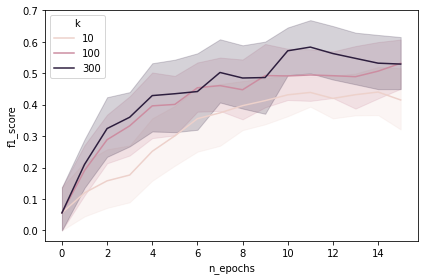

In [123]:
dfas = df.copy()
#dfas = df[df.pool=="AutoGluon"]
#dfas = dfas[dfas.n_replication==4]
dfas = dfas[dfas.k_neighbors==5]

#dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
#dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]
    
    #tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','competitor']).mean()
    #tmp = tmp.reset_index()
    
    plt.figure()
    tmp.rename(columns={'k_init':'k', 'max_epochs':'n_epochs'}, inplace=True)

    ax = sns.lineplot(x="n_epochs", y="f1_score", data=tmp, hue="k")
    #sns.scatterplot(x="max_epochs", y="average score", data=tmp)
    #ax.set_ylim((0.0, 1.0))
    #ax.set_title(d)
    
    plt.tight_layout()
    #plt.savefig('../../results/elephant_boston.pdf')

In [64]:
dfas = df.copy()
#dfas = df[df.pool=="AutoGluon"]
dfas = dfas[dfas.n_replication!=3]
#dfas = dfas[dfas.k_init==20]

#dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
#dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]
    
    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','competitor']).agg(['mean', 'std'])
tmp    
    
   

average score  \
                                                                                mean   
pool      dataset k_init k_refinement max_epochs n_sampling competitor                 
AutoGluon churn   3      0            0          100        scores          0.273372   
                                      15         100        scores          0.936225   

                                                                                  \
                                                                             std   
pool      dataset k_init k_refinement max_epochs n_sampling competitor             
AutoGluon churn   3      0            0          100        scores      0.023140   
                                      15         100        scores      0.002053   

                                                                       n_replication  \
                                                                                mean   
pool      dataset k_init k_refinement max_epochs n_sampling competitor                 
AutoGluon churn   3      0            0          100        scores                 1   
                                      15         100        scores                 1   

                                                                             
                                                                        std  
pool      dataset k_init k_refinement max_epochs n_sampling competitor       
AutoGluon churn   3      0            0          100        scores      1.0  
                                      15         100        scores      1.0

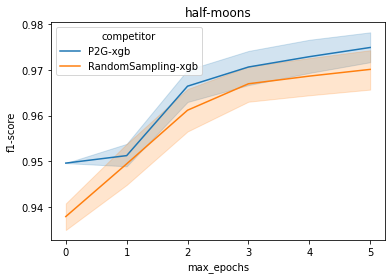

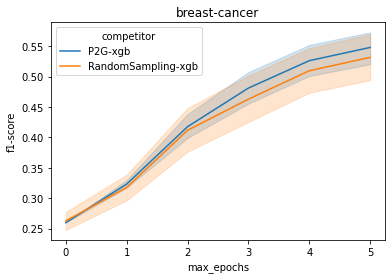

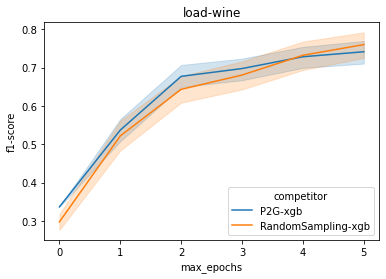

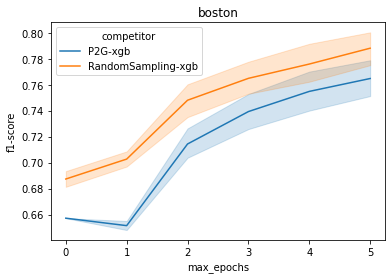

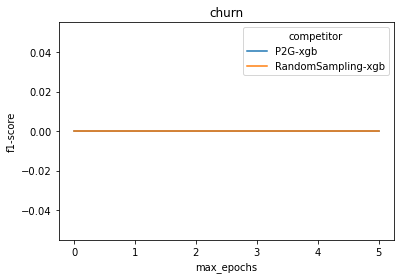

In [29]:
dfas = df[df.pool=="AutoSklearn"]
#dfas = dfas[dfas.max_epochs>3]
#dfas = dfas[dfas.k_refinement==0]
dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]

    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','n_replication','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="max_epochs", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

In [14]:
from sklearn.metrics import pairwise_distances_argmin
def get_explanation_interval(obs, p2g):
    # get all nodes from graph in the discrepancy area
    # get the closest node
    # get
    intervals = discrepancies_intervals.get_discrepancies_intervals(p2g.G)
X_train.shape, X_test.shape, y_train.mean()

((3350, 19), (1650, 19), 0.14328358208955225)

In [10]:
%%time
import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

from discrepancies import datasets, pool, pool2graph, evaluation, discrepancies_intervals
from sklearn.metrics import recall_score, f1_score



X_train, X_test, y_train, y_test, _, _, _ = datasets.get_dataset(dataset='churn', n_samples=500, noise=0.3)
pool1 = pool.AutogluonPool(max_delta_accuracies=0.05)
pool1 = pool1.fit(X_train, y_train, output_directory=None, time_limit=10)
print('F1 on Xtest', pool1.predict(X_test).apply(lambda x: f1_score(y_test, x)))
print('Discrepancy percentage', pool1.predict_discrepancies(X_train).mean())


p2g = pool2graph.pool2graph(X_train, y_train, pool1, k_init=100)

p2g.fit(max_epochs=5)





Traceback (most recent call last):
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/autogluon/utils/try_import.py", line 22, in try_import_lightgbm
    import lightgbm
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/lightgbm/basic.py", line 43, in <module>
    _LIB = _load_lib()
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/lightgbm/basic.py", line 34, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/ctypes/__init__.py", line 459, in LoadLibrary
    return self._dlltype(name)
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/ctypes/__init__.py", line 381, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen(/Users/b076r

avant suppression
['RandomForestClassifierGini', 'RandomForestClassifierEntr', 'ExtraTreesClassifierGini', 'ExtraTreesClassifierEntr', 'KNeighborsClassifierUnif', 'KNeighborsClassifierDist', 'CatboostClassifier', 'NeuralNetClassifier', 'weighted_ensemble_k0_l1']
                        model  score_test  score_val  pred_time_test  \
0  RandomForestClassifierGini    0.992537      0.950        0.060602   
1  RandomForestClassifierEntr    0.992239      0.948        0.060757   
2    ExtraTreesClassifierEntr    0.991045      0.940        0.085365   
3    ExtraTreesClassifierGini    0.990448      0.936        0.089116   
4    KNeighborsClassifierDist    0.983582      0.890        0.123060   
5         NeuralNetClassifier    0.980000      0.942        0.058625   
6     weighted_ensemble_k0_l1    0.977612      0.958        0.064494   
7          CatboostClassifier    0.976418      0.956        0.002833   
8    KNeighborsClassifierUnif    0.917910      0.890        0.121928   

   pred_time_val

In [16]:
%%time 
discr_pred = p2g.predict_discrepancies_from_graph(X_test, method='rf', k_neighbors=3)
discr_true = pool1.predict_discrepancies(X_test)


print('F1', f1_score(discr_true, discr_pred))


rf!
F1 0.5894736842105264
CPU times: user 1min 59s, sys: 1.17 s, total: 2min 1s
Wall time: 1min 8s


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KernelDensity, KNeighborsClassifier
from discrepancies import pool
import pandas as pd

n_instances = len(p2g.G.nodes)
print(n_instances)
kde = KernelDensity().fit(X_train)
kde_train = pd.DataFrame(kde.sample(n_samples=n_instances), columns=X_train.columns)
kde_labels = pool1.predict_discrepancies(kde_train)

kde_preds = RandomForestClassifier(n_estimators=200).fit(kde_train, kde_labels).predict(X_test)
#kde_preds = KNeighborsClassifier(n_neighbors=3).fit(kde_train, kde_labels).predict(X_test)

print('F1 KDE KNN', f1_score(discr_true, kde_preds))



# 45 41 50 - 59

98568
F1 KDE KNN 0.48290598290598297


In [13]:
pool2 = pool.AutogluonPool(max_delta_accuracies=0.9)
pool2 = pool2.fit(kde_train, kde_labels, output_directory=None, time_limit=20)
kde_preds = pool2.predictor.predict(X_test, model=pool2.predictor.get_model_best())


print('F1 KDE AutoGLuon', f1_score(discr_true, kde_preds))



avant suppression
['RandomForestClassifierGini', 'KNeighborsClassifierUnif', 'weighted_ensemble_k0_l1']
                        model  score_test  score_val  pred_time_test  \
0     weighted_ensemble_k0_l1    0.996155     0.8484      140.224475   
1  RandomForestClassifierGini    0.995942     0.8400        1.282379   
2    KNeighborsClassifierUnif    0.845893     0.7584      138.913294   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       3.534486  17.871003                 0.028802                0.003263   
1       0.060416  17.540583                 1.282379                0.060416   
2       3.470807   0.152402               138.913294                3.470807   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.178018            1       True          3  
1          17.540583            0       True          1  
2           0.152402            0       True          2  
to keep
0       weighted_ensemble_k0_l1
1    RandomFor

In [5]:





lnodes = p2g.get_nodes(discrepancies=True)
DISCR_features, DISCR_pool_predictions, DISCR_y_true, DISCR_ground_truth = p2g.get_nodes_attributes(lnodes)

sns.scatterplot(DISCR_features.iloc[:,0], DISCR_features.iloc[:,1], color='black', alpha=0.4,)
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train)
plt.show()


sns.scatterplot(DISCR_features.iloc[:,0], DISCR_features.iloc[:,1], color='black', alpha=0.4,)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=discr_true)
plt.title('True dicrepancy')
plt.show()

sns.scatterplot(DISCR_features.iloc[:,0], DISCR_features.iloc[:,1], color='black', alpha=0.4,)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=discr_pred)
plt.title('Predicted discrepancy')
plt.show()


discr_errors = (discr_pred != discr_true).astype('int')
sns.scatterplot(DISCR_features.iloc[:,0], DISCR_features.iloc[:,1], color='black', alpha=0.4,)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=discr_errors, palette=['cyan', 'red'])
plt.title('Discrepancy mispredictions')
plt.show()


sns.scatterplot(DISCR_features.iloc[:,0], DISCR_features.iloc[:,1], color='black', alpha=0.4,)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=kde_preds)
plt.title('Predicted KDE discrepancy')
plt.show()


NameError: name 'sns' is not defined

In [71]:
# GRAPH 3 10
# KNN 1 3 10
##F1 0.53 0.42 0.39
## RF 0, 0

# HALFMOONS 3 10
#KNN 1,0.53 ; 3,0.25
## RF 0.33



# HALFMOONS 30 20
##KNN 1,0.77 ; 3,0.77 ;10,0.62
##RF 0.71

